# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [103]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    #print(query_url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing Record 1 of Set 0 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 0 | marsh harbour
Processing Record 3 of Set 0 | atambua
Processing Record 4 of Set 0 | walvis bay
Processing Record 5 of Set 0 | cape town
Processing Record 6 of Set 0 | mataura
Processing Record 7 of Set 0 | okha
Processing Record 8 of Set 0 | butaritari
Processing Record 9 of Set 0 | samusu
City not found. Skipping...
Processing Record 10 of Set 0 | batsfjord
Processing Record 11 of Set 0 | svetlogorsk
Processing Record 12 of Set 0 | rikitea
Processing Record 13 of Set 0 | jamestown
Processing Record 14 of Set 0 | mar del plata
Processing Record 15 of Set 0 | tiksi
Processing Record 16 of Set 0 | najran
Processing Record 17 of Set 0 | kavieng
Processing Record 18 of Set 0 | constitucion
Processing Record 19 of Set 0 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 0 | vaini
Process

Processing Record 34 of Set 3 | amderma
City not found. Skipping...
Processing Record 35 of Set 3 | balabac
Processing Record 36 of Set 3 | soe
Processing Record 37 of Set 3 | warri
Processing Record 38 of Set 3 | mataram
Processing Record 39 of Set 3 | leningradskiy
Processing Record 40 of Set 3 | mahadday weyne
City not found. Skipping...
Processing Record 41 of Set 3 | curaca
Processing Record 42 of Set 3 | bandarbeyla
Processing Record 43 of Set 3 | ladario
Processing Record 44 of Set 3 | faanui
Processing Record 45 of Set 3 | porto novo
Processing Record 46 of Set 3 | bolungarvik
City not found. Skipping...
Processing Record 47 of Set 3 | the valley
Processing Record 48 of Set 3 | kasuga
Processing Record 49 of Set 3 | taltal
Processing Record 50 of Set 3 | ibra
Processing Record 0 of Set 4 | hengyang
Processing Record 1 of Set 4 | coquimbo
Processing Record 2 of Set 4 | ewa beach
Processing Record 3 of Set 4 | paris
Processing Record 4 of Set 4 | padang
Processing Record 5 of Set

Processing Record 22 of Set 7 | estelle
Processing Record 23 of Set 7 | zhigansk
Processing Record 24 of Set 7 | arauca
Processing Record 25 of Set 7 | bolshiye kaybitsy
City not found. Skipping...
Processing Record 26 of Set 7 | vila franca do campo
Processing Record 27 of Set 7 | longyearbyen
Processing Record 28 of Set 7 | clyde river
Processing Record 29 of Set 7 | uribia
Processing Record 30 of Set 7 | yarmouth
Processing Record 31 of Set 7 | freetown
Processing Record 32 of Set 7 | mezhevoy
Processing Record 33 of Set 7 | pemangkat
Processing Record 34 of Set 7 | nago
Processing Record 35 of Set 7 | bone
Processing Record 36 of Set 7 | ituni
City not found. Skipping...
Processing Record 37 of Set 7 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 7 | cruzilia
Processing Record 39 of Set 7 | chistogorskiy
Processing Record 40 of Set 7 | teknaf
Processing Record 41 of Set 7 | ust-tsilma
Processing Record 42 of Set 7 | tocopilla
Processing Record 43 of Set 7 | auki

Processing Record 9 of Set 11 | augusto correa
Processing Record 10 of Set 11 | puerto escondido
Processing Record 11 of Set 11 | arman
Processing Record 12 of Set 11 | kitangari
Processing Record 13 of Set 11 | akhisar
Processing Record 14 of Set 11 | port augusta
Processing Record 15 of Set 11 | leua
Processing Record 16 of Set 11 | bara
Processing Record 17 of Set 11 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 11 | udachnyy
Processing Record 19 of Set 11 | shelburne
Processing Record 20 of Set 11 | japura
Processing Record 21 of Set 11 | ayan
Processing Record 22 of Set 11 | owando
Processing Record 23 of Set 11 | toamasina
Processing Record 24 of Set 11 | igrim
Processing Record 25 of Set 11 | rawson
Processing Record 26 of Set 11 | bridlington
Processing Record 27 of Set 11 | kutum
Processing Record 28 of Set 11 | matamoros
Processing Record 29 of Set 11 | los rastrojos
Processing Record 30 of Set 11 | cherkasskoye
Processing Record 31 of Set 11 | harper


In [45]:
weather_df = weather_df.dropna(thresh = 3)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,marsh harbour,27,BS,1613942065,75,26.5412,-77.0636,67.28,26.49
1,atambua,100,ID,1613942065,87,-9.1061,124.8925,72.84,2.35
2,walvis bay,1,NA,1613942065,82,-22.9575,14.5053,62.01,6.91
3,cape town,0,ZA,1613941876,59,-33.9258,18.4232,64.00,18.41
4,mataura,0,NZ,1613942066,48,-46.1927,168.8643,61.74,2.04
...,...,...,...,...,...,...,...,...,...
573,arona,40,ES,1613942177,68,28.0996,-16.6810,64.40,4.61
574,atar,0,MR,1613942177,19,20.5169,-13.0499,72.23,9.82
575,ostrovnoy,25,RU,1613942177,84,68.0531,39.5131,-18.06,6.89
576,marienburg,94,PL,1613942178,86,54.0359,19.0266,39.99,7.07


In [55]:
#save to csv file
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
weather_df.to_csv("City_Data.csv", index=False, header=True)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,marsh harbour,27,BS,1613942065,75,26.5412,-77.0636,67.28,26.49
1,atambua,100,ID,1613942065,87,-9.1061,124.8925,72.84,2.35
2,walvis bay,1,NA,1613942065,82,-22.9575,14.5053,62.01,6.91
3,cape town,0,ZA,1613941876,59,-33.9258,18.4232,64.00,18.41
4,mataura,0,NZ,1613942066,48,-46.1927,168.8643,61.74,2.04


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":new_cities,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":temp,
    "Wind Speed":wind
}

In [57]:
weather_df = pd.DataFrame(weather_dict)

In [58]:
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,marsh harbour,27,BS,1613942065,75,26.5412,-77.0636,67.28,26.49
1,atambua,100,ID,1613942065,87,-9.1061,124.8925,72.84,2.35
2,walvis bay,1,NA,1613942065,82,-22.9575,14.5053,62.01,6.91
3,cape town,0,ZA,1613941876,59,-33.9258,18.4232,64.00,18.41
4,mataura,0,NZ,1613942066,48,-46.1927,168.8643,61.74,2.04
...,...,...,...,...,...,...,...,...,...
573,arona,40,ES,1613942177,68,28.0996,-16.6810,64.40,4.61
574,atar,0,MR,1613942177,19,20.5169,-13.0499,72.23,9.82
575,ostrovnoy,25,RU,1613942177,84,68.0531,39.5131,-18.06,6.89
576,marienburg,94,PL,1613942178,86,54.0359,19.0266,39.99,7.07


In [59]:
weather_df.describe()


,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,578.000000,5.780000e+02,578.000000,578.000000,578.000000,578.000000,578.000000
mean,50.600346,1.613942e+09,70.759516,18.437328,20.535022,52.124516,7.970502
std,40.133933,6.765233e+01,20.486609,32.974620,89.794008,32.579303,5.519173
min,0.000000,1.613942e+09,3.000000,-54.800000,-175.200000,-37.860000,0.220000
25%,1.000000,1.613942e+09,60.000000,-8.931625,-58.523225,35.600000,3.850000
50%,47.000000,1.613942e+09,75.500000,21.331250,26.470150,63.710000,6.910000
75%,90.000000,1.613942e+09,86.000000,46.003100,100.349575,77.000000,10.360000
max,100.000000,1.613942e+09,100.000000,78.218600,179.316700,98.670000,36.820000


In [60]:
weather_df['Max Temp'] = weather_df['Max Temp'].replace('', np.nan)
weather_df = weather_df.dropna()
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,marsh harbour,27,BS,1613942065,75,26.5412,-77.0636,67.28,26.49
1,atambua,100,ID,1613942065,87,-9.1061,124.8925,72.84,2.35
2,walvis bay,1,NA,1613942065,82,-22.9575,14.5053,62.01,6.91
3,cape town,0,ZA,1613941876,59,-33.9258,18.4232,64.00,18.41
4,mataura,0,NZ,1613942066,48,-46.1927,168.8643,61.74,2.04


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

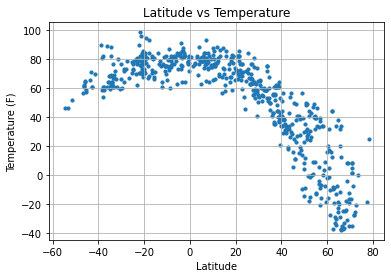

In [83]:
#scatter plot for TemperatureF vs Latitde 

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", s = 10)

plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

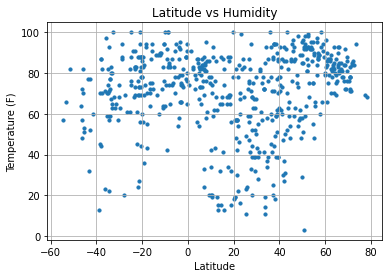

In [84]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", s = 10)

plt.title("Latitude vs Humidity")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

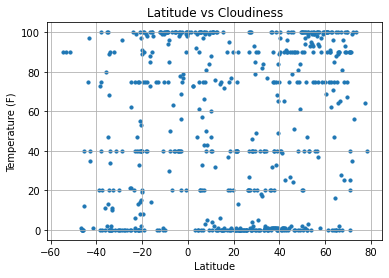

In [86]:
#scatter plot for Cloudiness% vs Latitude 
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", s = 10)

plt.title("Latitude vs Cloudiness")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

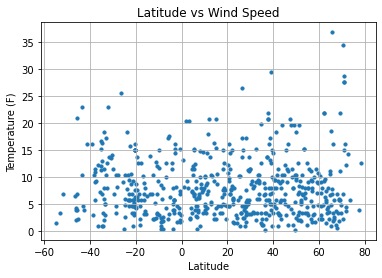

In [89]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", s = 10)

plt.title("Latitude vs Wind Speed")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [91]:
#dataframes for northern and southern hemispheres 
north_hemi_df = weather_df.loc[(weather_df["Lat"]>= 0)]
south_hemi_df = weather_df.loc[(weather_df["Lat"]< 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [93]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Lat')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


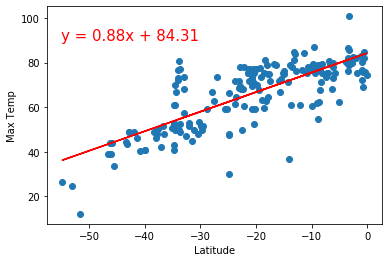

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.7827795718270301


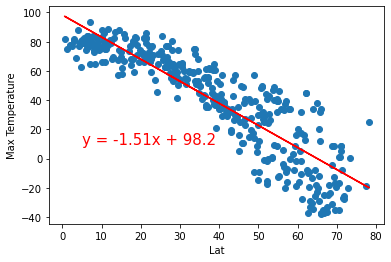

The r-value is: 0.09682563360334201


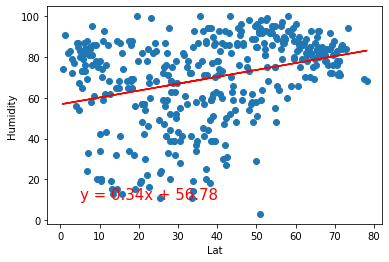

The r-value is: 0.0561494045019171


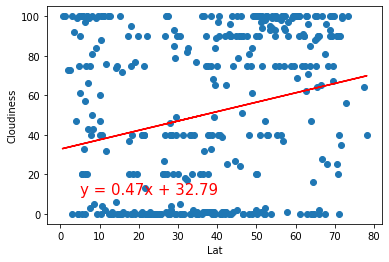

The r-value is: 0.001180594044155432


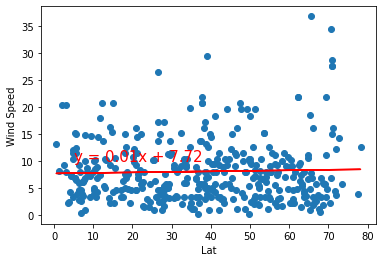

In [100]:
#linear regression of northern hemisphere's 
#temperatureF vs Latitude
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (5,10))


#humidty% vs Latitude 
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (5,10))


#cloudiness vs Latitude 
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (5,10))

#wind speed vs Latitude 
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,10))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30902711723724874


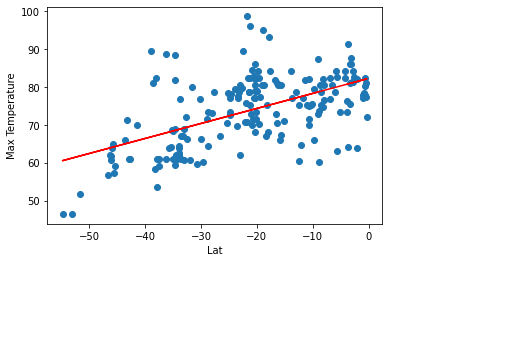

The r-value is: 0.10644730452927874


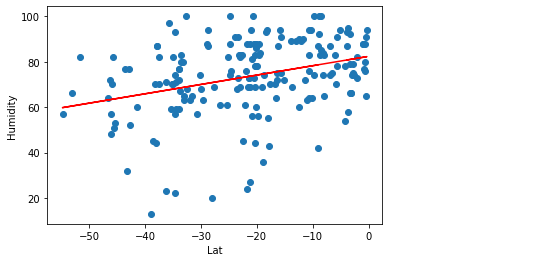

The r-value is: 0.15972851417264744


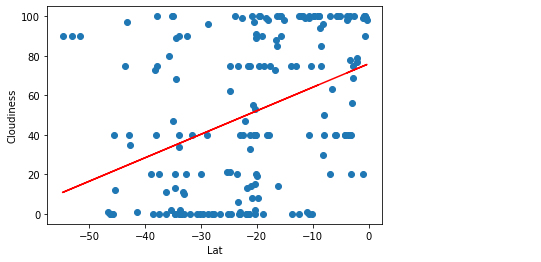

The r-value is: 0.025038606356036195


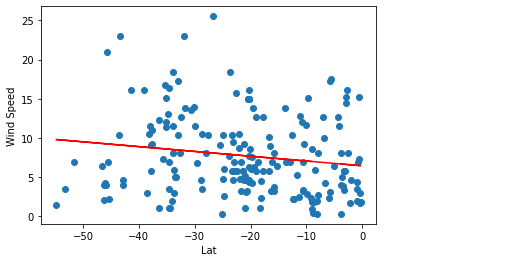

In [102]:
#linear regression of southern hemisphere's 
#temperatureF vs Latitude
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (5,10))


#humidty% vs Latitude 
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (5,10))


#cloudiness vs Latitude 
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (5,10))


#wind speed vs Latitude 
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,10))
